# Preprocess images with Grey World and Histogram Equalization

In [1]:
# ! pip install colorcorrect

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import torch
from pathlib import Path
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import random

In [3]:
import cv2
import colorcorrect.algorithm as cca

import matplotlib.pyplot as plt

In [4]:
train_path = Path("/home/ubuntu/data/sandwich/")/"train-315"

In [5]:
test_path = Path("/home/ubuntu/data/sandwich/")/"test-315"

# Grey World

In [6]:
new_train_path = Path("/home/ubuntu/data/sandwich/")/"gw-train-315"

In [7]:
new_train_path.mkdir(exist_ok=True)

In [8]:
new_test_path = Path("/home/ubuntu/data/sandwich/")/"gw-test-315"

In [9]:
new_test_path.mkdir(exist_ok=True)

In [10]:
def grey_world_image(img_path):
    img = cv2.imread(str(img_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gw_img = cca.grey_world(img)
    return cv2.cvtColor(gw_img, cv2.COLOR_RGB2BGR)

In [11]:
def grey_world_all_images(new_path, org_path):
    paths = [x for x in list(org_path.iterdir()) if x.is_dir()]
    for p in paths:
        label = p.parts[-1]
        (new_path/label).mkdir(exist_ok=True)
        files = list((org_path/label).iterdir())
        for f in files:
            f_name = f.parts[-1]
            gw_img = grey_world_image(f)
            cv2.imwrite(str(new_path/label/f_name), gw_img)

In [12]:
# grey_world_all_images(new_train_path, train_path)

In [13]:
# grey_world_all_images(new_test_path, test_path)

# Histogram Equalization

In [14]:
new_train_path = Path("/home/ubuntu/data/sandwich/")/"he-train-315"

In [15]:
new_train_path.mkdir(exist_ok=True)

In [16]:
new_test_path = Path("/home/ubuntu/data/sandwich/")/"he-test-315"

In [17]:
new_test_path.mkdir(exist_ok=True)

In [18]:
# https://stackoverflow.com/questions/42651595/histogram-equalization-python-for-colored-image
def histogram_equalize_image(img_path):
    img = cv2.imread(str(img_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_y_cr_cb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    y, cr, cb = cv2.split(img_y_cr_cb)
    y_eq = cv2.equalizeHist(y)
    img_y_cr_cb_eq = cv2.merge((y_eq, cr, cb))
    img_rgb_eq = cv2.cvtColor(img_y_cr_cb_eq, cv2.COLOR_YCR_CB2BGR)
    return cv2.cvtColor(img_rgb_eq, cv2.COLOR_RGB2BGR)

In [19]:
def histogram_equalize_all_images(new_path, org_path):
    paths = [x for x in list(org_path.iterdir()) if x.is_dir()]
    for p in paths:
        label = p.parts[-1]
        (new_path/label).mkdir(exist_ok=True)
        files = list((org_path/label).iterdir())
        for f in files:
            f_name = f.parts[-1]
            he_img = histogram_equalize_image(f)
            cv2.imwrite(str(new_path/label/f_name), he_img)

In [20]:
# histogram_equalize_all_images(new_train_path, train_path)

In [21]:
# histogram_equalize_all_images(new_test_path, test_path)

# Histogram Equalization then Grey World 

In [22]:
train_path = Path("/home/ubuntu/data/sandwich/")/"he-train-315"

In [23]:
test_path = Path("/home/ubuntu/data/sandwich/")/"he-test-315"

In [24]:
new_train_path = Path("/home/ubuntu/data/sandwich/")/"hewg-train-315"

In [25]:
new_train_path.mkdir(exist_ok=True)

In [26]:
new_test_path = Path("/home/ubuntu/data/sandwich/")/"hewg-test-315"

In [27]:
new_test_path.mkdir(exist_ok=True)

In [28]:
def grey_world_all_images(new_path, org_path):
    paths = [x for x in list(org_path.iterdir()) if x.is_dir()]
    for p in paths:
        label = p.parts[-1]
        (new_path/label).mkdir(exist_ok=True)
        files = list((org_path/label).iterdir())
        for f in files:
            f_name = f.parts[-1]
            gw_img = grey_world_image(f)
            cv2.imwrite(str(new_path/label/f_name), gw_img)

In [29]:
# grey_world_all_images(new_train_path, train_path)

In [30]:
# grey_world_all_images(new_test_path, test_path)

# As data augmentation functions

In [31]:
def grey_world(img):
    gw_img = cca.grey_world(img)
    return gw_img

In [32]:
def histogram_equalize(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_y_cr_cb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    y, cr, cb = cv2.split(img_y_cr_cb)
    y_eq = cv2.equalizeHist(y)
    img_y_cr_cb_eq = cv2.merge((y_eq, cr, cb))
    img_rgb_eq = cv2.cvtColor(img_y_cr_cb_eq, cv2.COLOR_YCR_CB2BGR)
    return cv2.cvtColor(img_rgb_eq, cv2.COLOR_RGB2BGR)

In [33]:
def gwhe_img(img):
    img = cca.grey_world(img)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    img_y_cr_cb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    y, cr, cb = cv2.split(img_y_cr_cb)
    y_eq = cv2.equalizeHist(y)
    img_y_cr_cb_eq = cv2.merge((y_eq, cr, cb))
    img_rgb_eq = cv2.cvtColor(img_y_cr_cb_eq, cv2.COLOR_YCR_CB2BGR)
    return cv2.cvtColor(img_rgb_eq, cv2.COLOR_RGB2BGR)

In [34]:
img_path = Path("/home/ubuntu/data/sandwich/train-315/club_sandwich/1017761.jpg")

In [35]:
img = cv2.imread(str(img_path))

In [36]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

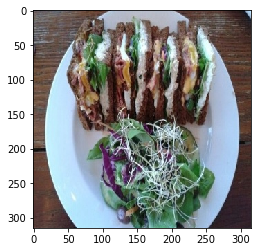

In [37]:
plt.imshow(img)

In [38]:
new_img = gwhe_img(img)

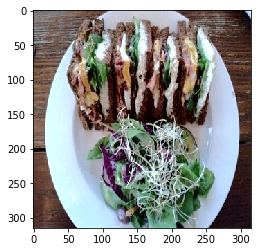

In [39]:
plt.imshow(new_img)